In [90]:
import colorsys
from pathlib import Path

import numpy as np
import cv2
import matplotlib.pyplot as plt


In [91]:
COLORS = [
    {
        "name": "red1",
        "hex": "#ff0000",
        "hue": 0
    },
    {
        "name": "orange",
        "hex": "#ff8000",
        "hue": 30
    },
    {
        "name": "yellow",
        "hex": "#ffff00",
        "hue": 60
    },
    {
        "name": "chartreuse",
        "hex": "#80ff00",
        "hue": 90
    },
    {
        "name": "green",
        "hex": "#00ff00",
        "hue": 120
    },
    {
        "name": "spring-green",
        "hex": "#00ff80",
        "hue": 150
    },
    {
        "name": "cyan",
        "hex": "#00ffff",
        "hue": 180
    },
    {
        "name": "azure",
        "hex": "#0080ff",
        "hue": 210
    },
    {
        "name": "blue",
        "hex": "#0000ff",
        "hue": 240
    },
    {
        "name": "violet",
        "hex": "#8000ff",
        "hue": 270
    },
    {
        "name": "magenta",
        "hex": "#ff00ff",
        "hue": 300
    },
    {
        "name": "rose",
        "hex": "#ff0080",
        "hue": 330
    },
    {
        "name": "red2",
        "hex": "#ff0000",
        "hue": 360
    }
]



In [92]:
print(np.round(0.06 / np.pi, 2))


0.02


In [93]:
image_path = Path("~/.wallpaper").expanduser()

image_raw = cv2.imread(image_path)


needable_size = 1000

height, width, _ = image_raw.shape
max_side = max(width, height)

if max_side > 2 * needable_size:
    scale = needable_size / max_side

    image_raw = cv2.resize(image_raw, (int(width * scale), int(height * scale)), interpolation=cv2.INTER_AREA)


image_rgb = cv2.cvtColor(image_raw, cv2.COLOR_BGR2RGB) / 255
image_hsv = cv2.cvtColor(image_raw, cv2.COLOR_BGR2HSV) / 255
image_hsv[..., 0] *= np.pi * 2


In [94]:
color_stamps = np.linspace(0, np.pi * 2, 13)[:-1]

delta = np.pi / 12
color_d = []
for stamp in color_stamps:
    color_d.append([stamp - delta, stamp + delta])

color_d = np.array(color_d)


hue, saturation, value = cv2.split(image_hsv)

print(saturation.mean(), saturation.min(), saturation.max())
print(value.mean(), value.min(), value.max())



0.6461791989393623 0.0 1.0
0.2864438071313935 0.0 1.0


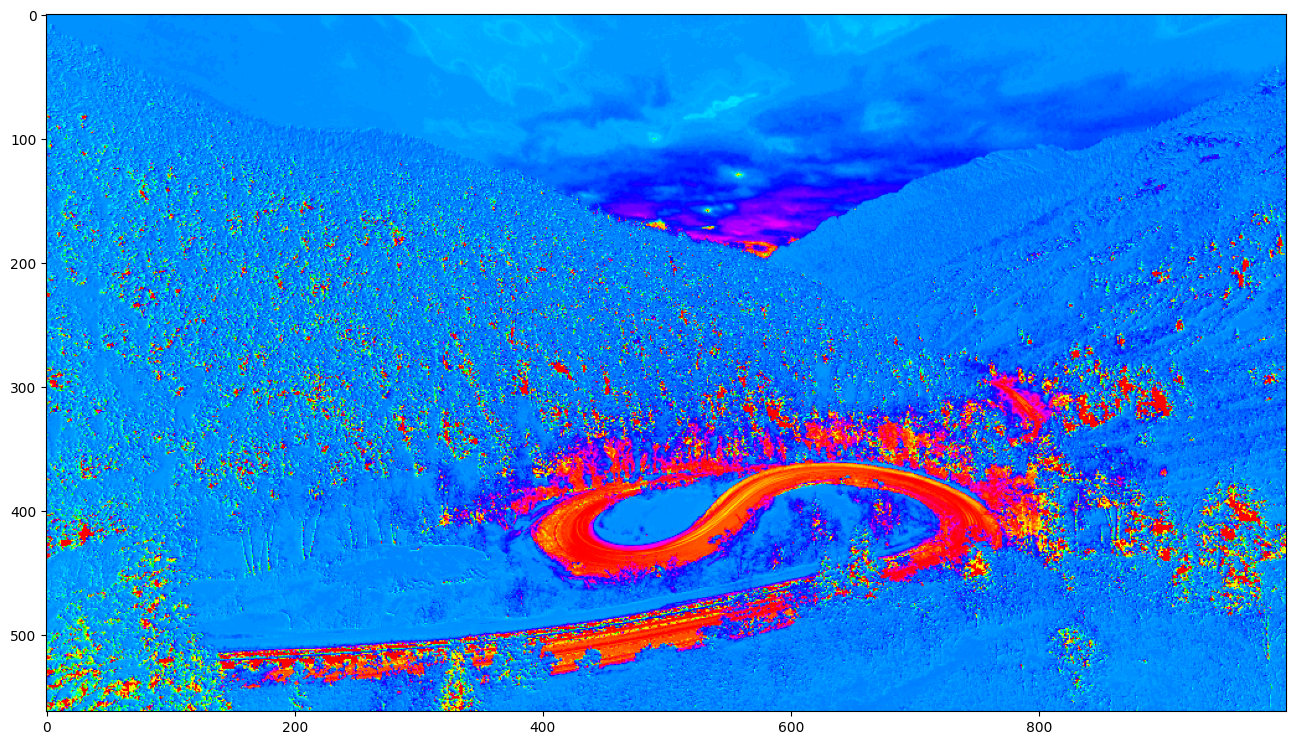

In [95]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 16))

ax.imshow(hue, cmap="hsv")

fig.savefig("hue.png", dpi=200)



L: [0.000, 1.000]
a: [-0.150, 0.646]
b: [-0.433, 0.724]


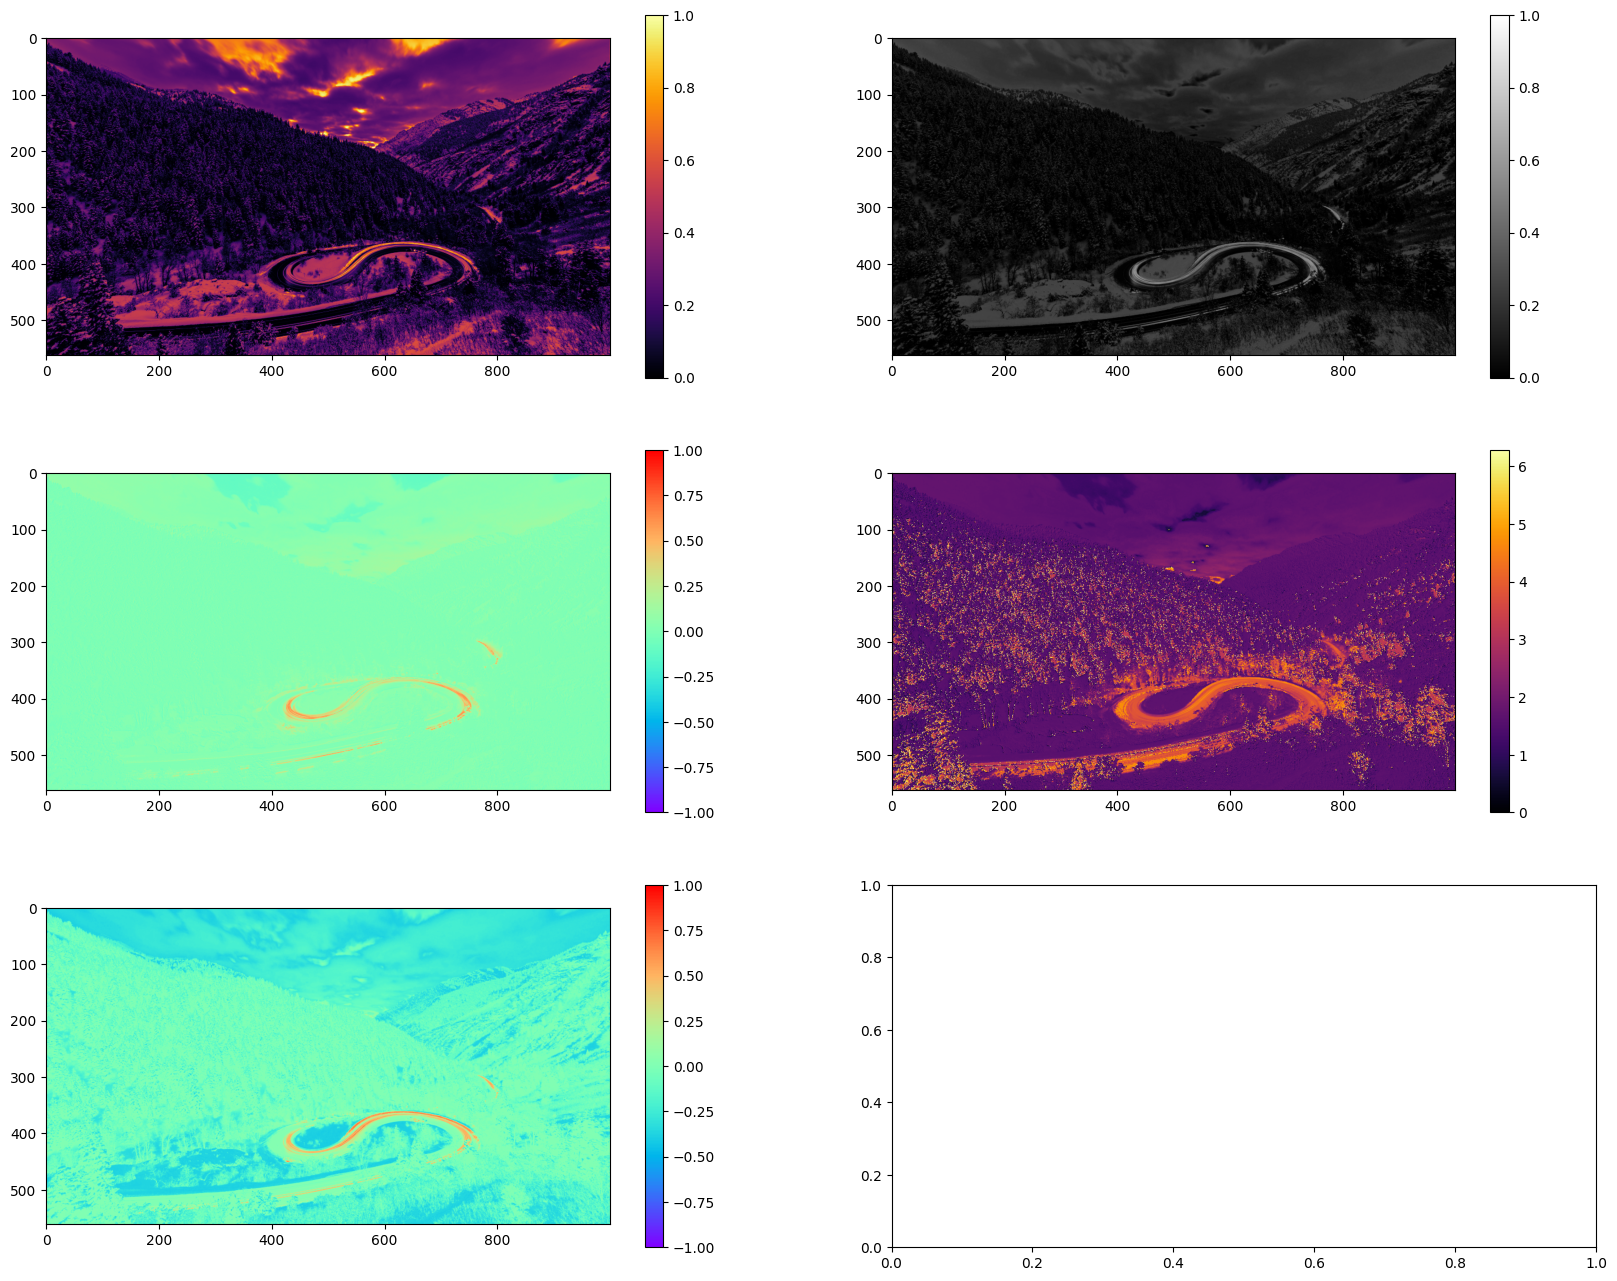

In [96]:
image_lab = cv2.cvtColor(image_raw, cv2.COLOR_BGR2LAB).astype(np.float32)
image_lab[..., 0] = image_lab[..., 0] / 255.0
image_lab[..., 1] = (image_lab[..., 1] - 128.0) / 127.0
image_lab[..., 2] = (image_lab[..., 2] - 128.0) / 127.0

chroma = np.hypot(image_lab[..., 1], image_lab[..., 2]) / np.sqrt(2)
hue = np.arctan2(image_lab[..., 2], image_lab[..., 1]) + np.pi

print(f"L: [{image_lab[..., 0].min():.3f}, {image_lab[..., 0].max():.3f}]")
print(f"a: [{image_lab[..., 1].min():.3f}, {image_lab[..., 1].max():.3f}]") 
print(f"b: [{image_lab[..., 2].min():.3f}, {image_lab[..., 2].max():.3f}]")

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(20, 16))

imd00 = ax[0][0].imshow(image_lab[..., 0], cmap="inferno", vmin=0.0, vmax=1.0)
fig.colorbar(imd00, ax=ax[0][0])

imd01 = ax[0][1].imshow(chroma, cmap="gray", vmin=0.0, vmax=1.0)
fig.colorbar(imd01, ax=ax[0][1])

imd10 = ax[1][0].imshow(image_lab[..., 1], cmap="rainbow", vmin=-1.0, vmax=1.0)
fig.colorbar(imd10, ax=ax[1][0])

imd11 = ax[1][1].imshow(hue, cmap="inferno", vmin=0.0, vmax=np.pi * 2)
fig.colorbar(imd11, ax=ax[1][1])

imd20 = ax[2][0].imshow(image_lab[..., 2], cmap="rainbow", vmin=-1.0, vmax=1.0)
fig.colorbar(imd20, ax=ax[2][0])

In [97]:
r = np.arctan2(0, 1)
g = np.arctan2(0, -1)
b = np.arctan2(-1, 0)
y = np.arctan2(1, 0)
print("Red:", r)
print("Green:", g)
print("Blue:", b)
print("Yellow:", y)

Red: 0.0
Green: 3.141592653589793
Blue: -1.5707963267948966
Yellow: 1.5707963267948966


In [ ]:
STANDART_THRESHOLDS_CHROMA = {
    "achromatic": 0.02,      # Полностью ахроматический - не отличим от серого
    "near-neutral": 0.06,    # Почти нейтральный - едва заметный оттенок
    "very-weak-color": 0.12, # Очень слабый цвет
    "weak-color": 0.18,     # Слабый цвет (пастельные тона)
    "medium-color": 0.30,   # Умеренный цвет
    "strong-color": 0.45,   # Сильный цвет
    "very-strong-color": 0.60, # Очень сильный цвет
    "vivid-color": 0.80,    # Яркий, насыщенный цвет
}

STANDART_THRESHOLDS_GRAYS = {
    "very-dark": 0.20,      # Очень темный
    "dark": 0.35,           # Темный
    "medium-dark": 0.50,    # Средне-темный
    "medium": 0.65,         # Средний
    "medium-light": 0.80,   # Средне-светлый  
    "light": 0.90,          # Светлый
    "very-light": 0.95,     # Очень светлы
}

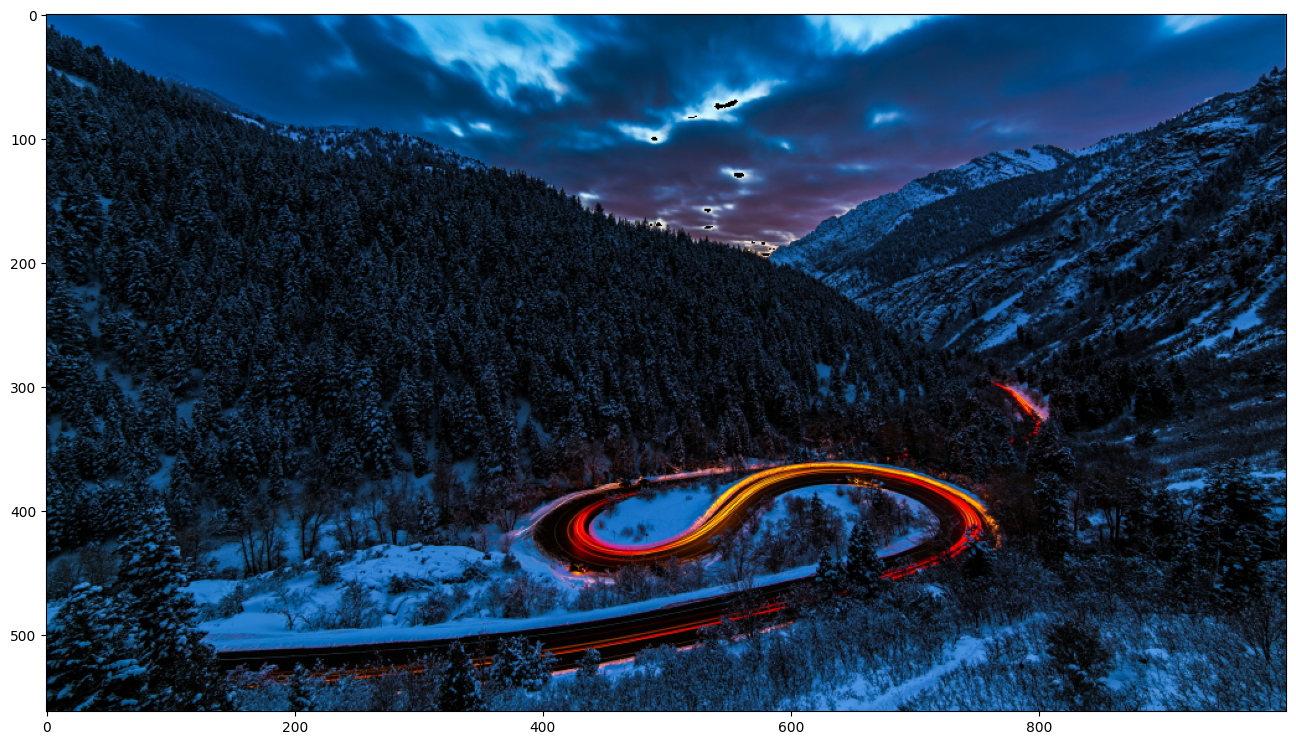

In [100]:
mask = image_lab[..., 0] > STANDART_THRESHOLDS_GRAYS["very-light"]

image_rgb_copy = image_rgb.copy()
image_rgb_copy[..., 0][mask] = 0
image_rgb_copy[..., 1][mask] = 0
image_rgb_copy[..., 2][mask] = 0

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 16))

ax.imshow(image_rgb_copy)